### Connecting to google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [4]:
# Device Configuation
device = torch.device("cude:0" if torch.cuda.is_available() else "cpu")

In [9]:
torchvision.datasets.CIFAR10

torchvision.datasets.cifar.CIFAR10

In [11]:
# Hyper parameters
cifar10_classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

epochs = 5
classes = 10
batch_size = 100
lr = 0.001

#CIFAT-10 Dataset
train_dataset = torchvision.datasets.CIFAR10(root = 'ddrive/MyDrive/data/cifar-10', train=True,
                                             download = True, transform = transforms.ToTensor())


test_dataset = torchvision.datasets.CIFAR10(root = 'ddrive/MyDrive/data/cifar-10', train=False,
                                             download = True, transform = transforms.ToTensor())


#Data Loader
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size,
                                          shuffle = True, num_workers = 0)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size,
                                          shuffle = False, num_workers = 0)


Files already downloaded and verified
Files already downloaded and verified


torch.Size([3, 32, 32]) torch.Size([3, 32, 32])
8


Text(0.5, 1.0, 'ship')

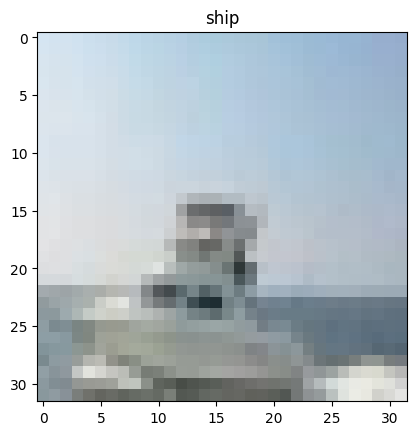

In [13]:
import numpy as np
image , label = train_dataset[batch_size]
print(image.size(), image.shape)
print(label)
plt.imshow(np.transpose(image, (1,2,0)))
plt.title(cifar10_classes[label])

In [26]:
## covolutional Neural Network (two convolutional Layers)
class ConvNet(nn.Module):
  def __init__(self, classes=10):
    super(ConvNet, self).__init__()
    self.layer1 = nn.Sequential(
        nn.Conv2d(3, 16, kernel_size = 5, stride=1, padding=2),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size =2 , stride = 2)
    )

    self.layer2 = nn.Sequential(
        nn.Conv2d(16,32, kernel_size = 5, stride = 1, padding = 2),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2, stride = 2)
    )

    self.fc = nn.Linear(8*8*32, classes)

  def forward(self, x):
    out = self.layer1(x)
    #print (out.shape)
    out = self.layer2(out)
    #print(out.shape)

    out = out.reshape(out.size(0),-1)  # reshaping the layer bcz input of FC layer must me FC array
    #print(out.shape)
    out = self.fc(out)

    return out


In [27]:
model = ConvNet(classes).to(device)  # passing the created model into availabel GPU or CPU

In [28]:
# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = lr)


### Training


In [29]:
# Train the model
total_step = len(train_loader)
for epoch in range(epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.to(device)
    labels = labels.to(device)

    #forward pass
    output = model(images)
    loss = criterion(output, labels)

    #Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


    if(i+1) % 100 == 0:
      print('Epoch [ {} / {}], step [{} / {}] , loss : {:.4f}'.format(epoch+1, epochs, i+1, total_step, loss.item()))

Epoch [ 1 / 5], step [100 / 500] , loss : 1.5346
Epoch [ 1 / 5], step [200 / 500] , loss : 1.2247
Epoch [ 1 / 5], step [300 / 500] , loss : 1.2996
Epoch [ 1 / 5], step [400 / 500] , loss : 1.3249
Epoch [ 1 / 5], step [500 / 500] , loss : 1.0220
Epoch [ 2 / 5], step [100 / 500] , loss : 0.9525
Epoch [ 2 / 5], step [200 / 500] , loss : 1.0666
Epoch [ 2 / 5], step [300 / 500] , loss : 0.8630
Epoch [ 2 / 5], step [400 / 500] , loss : 0.9258
Epoch [ 2 / 5], step [500 / 500] , loss : 0.8839
Epoch [ 3 / 5], step [100 / 500] , loss : 1.0348
Epoch [ 3 / 5], step [200 / 500] , loss : 1.0066
Epoch [ 3 / 5], step [300 / 500] , loss : 1.0619
Epoch [ 3 / 5], step [400 / 500] , loss : 0.9975
Epoch [ 3 / 5], step [500 / 500] , loss : 0.7252
Epoch [ 4 / 5], step [100 / 500] , loss : 0.8455
Epoch [ 4 / 5], step [200 / 500] , loss : 0.8924
Epoch [ 4 / 5], step [300 / 500] , loss : 0.9764
Epoch [ 4 / 5], step [400 / 500] , loss : 1.0125
Epoch [ 4 / 5], step [500 / 500] , loss : 0.8784
Epoch [ 5 / 5], step

### Test the Model

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
  correct = 0
  total = 0
  for images, labels in test_loader:
    images = images.to(device)
    labels = images.to(device)
    output = model(images)
    _ , pred = torch.max(output.data, 1)
    total += labels.size(0)
    correct += (pred == labels).sum().item()

  print('Test Accuracy of the model on the 10K test images: {} %'.format(100 * correct ))